Cette première cellule vous présente la manière avec laquelle j'ai obtenu les features/caractéristiques à partir des jeux de données de "textes"
Pour obtenir les textes (et les "filtrer") j'ai utiliser le script ./textDatasets/conversion.sh (qui prends, par exemple les fichiers FR_* les concatene, supprime les accents (en gardant les caracteres sans accents) et enfin transforme en minuscules).
J'ai utilisé les livres "open data" de la base du site Guttenberg Project (qui archive énormément de livres en texte, "txt" simples", tombés dans le domaine publique).

In [1]:
import numpy as np
import string
BlockSz=100
# On procede de la même façon pour les differents languages
# Ouverture du fichier texte contenant les caracteres alphabetiques "brutes"
textGERMAN = open('./textDatasets/GERMAN')
# Lecture
DE=textGERMAN.read()
textGERMAN.close()
# Calcule du nombre de blocks (arrondi par defaut) de BlockSz caracteres
NbBlock=int(np.floor(len(DE)/BlockSz))
# Creation des tableaux de donnees textuelles et de features
DataDE=[]
FeaDE =[]
# Pour tous les indices de blocks ...
for index in range(NbBlock):
    # Exctraction des donnees texte du block
    DataDE.append(DE[index*BlockSz:(index+1)*BlockSz])
    # Comptage de chacun des caracteres
    countDE=[]
    for letter in string.ascii_lowercase:
        countDE.append(DataDE[index].count(letter))
    # Comptage de toutes les 26**2 paires de caracteres possibles
    for letter1 in string.ascii_lowercase:
        for letter2 in string.ascii_lowercase:
            countDE.append(DataDE[index].count(letter1+letter2))
    # Une fois le vecteur de décompte obtenu  .... on ajoute ce vecteur (contenant tous les decomptes) au tableaux des features
    FeaDE.append(countDE)

# On procede de la même façon pour les differents languages ....
textFRENCH = open('./textDatasets/FRENCH')
FR=textFRENCH.read()
textFRENCH.close()
NbBlock=int(np.floor(len(FR)/BlockSz))
DataFR=[]
FeaFR =[]
for index in range(NbBlock):
    DataFR.append(FR[index*BlockSz:(index+1)*BlockSz])
    countFR=[]
    for letter in string.ascii_lowercase:
        countFR.append(DataFR[index].count(letter))
    for letter1 in string.ascii_lowercase:
        for letter2 in string.ascii_lowercase:
            countFR.append(DataFR[index].count(letter1+letter2))
    FeaFR.append(countFR)

# On procede de la même façon pour les differents languages ....
textSPANISH = open('./textDatasets/SPANISH')
ES=textSPANISH.read()
textSPANISH.close()
NbBlock=int(np.floor(len(ES)/BlockSz))
DataES=[]
FeaES =[]
for index in range(NbBlock):
    DataES.append(ES[index*BlockSz:(index+1)*BlockSz])
    countES=[]
    for letter in string.ascii_lowercase:
        countES.append(DataES[index].count(letter))
    for letter1 in string.ascii_lowercase:
        for letter2 in string.ascii_lowercase:
            countES.append(DataES[index].count(letter1+letter2))
    FeaES.append(countES)

# On procede de la même façon pour les differents languages ....
textENGLISH = open('./textDatasets/ENGLISH')
EN=textENGLISH.read()
textENGLISH.close()
NbBlock=int(np.floor(len(EN)/BlockSz))
DataEN=[]
FeaEN =[]
for index in range(NbBlock):
    DataEN.append(EN[index*BlockSz:(index+1)*BlockSz])
    countEN=[]
    for letter in string.ascii_lowercase:
        countEN.append(DataEN[index].count(letter))
    for letter1 in string.ascii_lowercase:
        for letter2 in string.ascii_lowercase:
            countEN.append(DataEN[index].count(letter1+letter2))
    FeaEN.append(countEN)

In [2]:
# Ici on sauvegarde les caracteristiques, pour eviter de les recalculer à chaque fois ....

np.save('./FeaEN.npy', FeaEN)
np.save('./FeaFR.npy', FeaFR)
np.save('./FeaDE.npy', FeaDE)
np.save('./FeaES.npy', FeaES)

In [3]:
# ... On peut simplement les loader (et commenter les cellules precedentes)
FeaEN = np.load('./FeaEN.npy')
FeaFR = np.load('./FeaFR.npy')
FeaDE = np.load('./FeaDE.npy')
FeaES = np.load('./FeaES.npy')

In [4]:
# Pour plus de "facilier de manipulation" on trasforme les donnes en "matrice numpy" et on affiche la dimension de la base de donnees.
FeaDE = np.array(FeaDE)
print(FeaDE.shape)

FeaFR = np.array(FeaFR)
print(FeaFR.shape)

FeaES = np.array(FeaES)
print(FeaES.shape)

FeaEN = np.array(FeaEN)
print(FeaEN.shape)

(43292, 702)
(41160, 702)
(43218, 702)
(42095, 702)


In [5]:
import pandas as pd
df_DE = pd.DataFrame(data=FeaDE)
df_DE.head()
df_DE["langue"]=0
df_DE.head()

,0,1,2,3,4,5,6,7,8,9,...,693,694,695,696,697,698,699,700,701,langue
0,1,3,0,7,18,1,5,5,8,1,...,0,0,1,2,0,0,0,0,0,0
1,6,2,5,6,12,9,4,6,7,0,...,0,0,0,0,0,0,0,0,0,0
2,4,4,2,5,18,2,1,2,6,1,...,0,0,1,0,0,0,0,0,0,0
3,10,0,6,5,14,1,3,7,5,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,3,4,19,2,5,7,7,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_EN = pd.DataFrame(data=FeaEN)
df_EN.head()
df_EN["langue"]=1
df_EN.head()

,0,1,2,3,4,5,6,7,8,9,...,693,694,695,696,697,698,699,700,701,langue
0,8,3,4,5,13,1,3,3,10,0,...,0,0,0,0,0,0,0,0,0,1
1,6,3,2,5,13,1,4,8,8,0,...,0,0,0,0,0,0,0,0,0,1
2,7,2,5,2,7,1,1,6,10,0,...,0,0,0,0,0,0,0,0,0,1
3,6,0,2,7,16,2,1,9,5,0,...,0,0,0,0,0,0,0,0,0,1
4,9,3,2,6,11,2,4,6,9,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
df_ENvsDE=pd.concat([df_EN,df_DE])

In [8]:
print("la taille de concaténation:",df_ENvsDE.shape[0],"la taille de la somme:",(df_EN.shape[0]+df_DE.shape[0]))

la taille de concaténation: 85387 la taille de la somme: 85387


In [9]:
df_ENvsDE=df_ENvsDE.sample(frac=1).reset_index(drop=True)
df_ENvsDE

,0,1,2,3,4,5,6,7,8,9,...,693,694,695,696,697,698,699,700,701,langue
0,6,1,2,4,10,3,5,5,9,0,...,0,0,0,0,0,0,0,0,0,1
1,12,0,3,4,12,1,2,6,9,0,...,0,0,0,0,0,0,0,0,0,1
2,5,1,4,8,14,3,1,5,7,0,...,0,0,0,1,0,0,0,0,0,0
3,9,1,2,5,14,1,3,8,7,0,...,0,0,0,0,0,0,0,0,0,1
4,3,4,4,3,18,1,7,5,7,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85382,10,3,2,2,16,0,1,8,6,0,...,0,0,0,0,0,0,0,0,0,1
85383,14,3,3,2,14,0,2,5,9,0,...,0,0,0,0,0,0,0,0,0,1
85384,10,1,2,6,16,3,4,4,6,1,...,0,0,0,3,0,0,0,0,0,0
85385,11,0,2,8,11,1,3,10,8,1,...,0,0,0,0,0,0,0,0,0,1


## Questions:
* 1) Réaliser une classification binaire en utilisant les méthodes linéaires suivantes: regression "ridge", LASSO et SVM (sans noyau !).
 * Pour ces méthodes vous devez faire une recherche du meilleur paramètre de régularisation ;
 * Vous devrez égalemement selectionner les deux languages de votre choix
 * Dans l'exemple fourni la taille des block de caractère extraits 

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [11]:
X=df_ENvsDE.drop(["langue"],axis=1)
y=df_ENvsDE[['langue']]

In [12]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,692,693,694,695,696,697,698,699,700,701
0,6,1,2,4,10,3,5,5,9,0,...,0,0,0,0,0,0,0,0,0,0
1,12,0,3,4,12,1,2,6,9,0,...,0,0,0,0,0,0,0,0,0,0
2,5,1,4,8,14,3,1,5,7,0,...,0,0,0,0,1,0,0,0,0,0
3,9,1,2,5,14,1,3,8,7,0,...,0,0,0,0,0,0,0,0,0,0
4,3,4,4,3,18,1,7,5,7,0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
y.head()

,langue
0,1
1,1
2,0
3,1
4,0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [15]:
clf = LogisticRegression(max_iter=1000).fit(X_train,y_train.values.ravel() )

In [16]:
clf.score(X_test,y_test)

0.9996151980057219

In [17]:
y_pred=clf.predict(X_test)

In [18]:
y_pred

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [19]:
y_test.values.ravel()

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [20]:
from sklearn import metrics


def classification_metrics(y, y_pred):
    return pd.DataFrame(
        {
            "accuracy_score": metrics.accuracy_score(y_true=y, y_pred=y_pred),
            "f1_score": metrics.f1_score(y_true=y, y_pred=y_pred),
            "precision_score": metrics.precision_score(
                y_true=y, y_pred=y_pred),
            "recall_score": metrics.recall_score(y_true=y, y_pred=y_pred)
        },
        index=[0])

In [21]:
print("Classification metrics for test data")
print(classification_metrics(y_test, y_pred))

Classification metrics for test data
   accuracy_score  f1_score  precision_score  recall_score
0        0.999615  0.999613         0.999462      0.999764


In [22]:
def roc_curves_plot(y_train, pred_proba_train, y_test, pred_proba_test):
    false_positive_rate_train, true_positive_rate_train, _ = metrics.roc_curve(
        y_train, pred_proba_train)
    roc_auc_train = metrics.auc(false_positive_rate_train,
                                true_positive_rate_train)

    false_positive_rate_test, true_positive_rate_test, _ = metrics.roc_curve(
        y_test, pred_proba_test)
    roc_auc_test = metrics.auc(false_positive_rate_test,
                               true_positive_rate_test)

    plt.title('Receiver Operating Characteristic')
    plt.plot(
        false_positive_rate_train,
        true_positive_rate_train,
        'b',
        label='AUC Train = %0.4f' % roc_auc_train)
    plt.plot(
        false_positive_rate_test,
        true_positive_rate_test,
        'g',
        label='AUC Test = %0.4f' % roc_auc_test)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [23]:
pred_proba_train = clf.predict_proba(X_train)[:,1]
pred_proba_test = clf.predict_proba(X_test)[:,1]

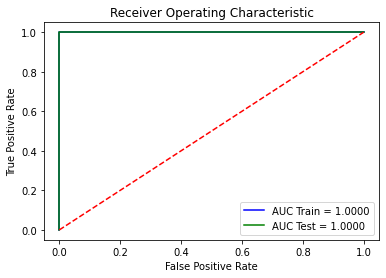

In [24]:
import matplotlib.pyplot as plt
roc_curves_plot(y_train, pred_proba_train, y_test, pred_proba_test)

In [25]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
confusion_matrix(y_test, y_pred)

array([[30036,    16],
       [    7, 29712]], dtype=int64)

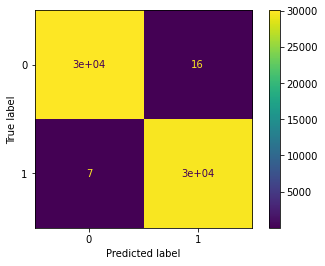

In [26]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()  

In [27]:
from sklearn.linear_model import RidgeClassifier
clf_ridge = RidgeClassifier().fit(X_train, y_train.values.ravel())


In [28]:
clf_ridge.score(X_test,y_test)

0.9986950193237524

## Questions:
* 2) Réaliser une classification binaire avec l'une des méthodes linéaire précédent en utilisant la réduction de dimension (ACP par exemple, ou une autre méthode)


## Questions:
* 3) Modifier la taille des données extraites (BlockSz) afin de trouver une taille à partir de la quelle un taux d'erreur de l'ordre de 10% est observée
 * Avec cette taille de block comparer les méthodes de classification précédentes (avec et sans réduction de dimentionalité)

## Questions:
* 4. Réaliser une classification binaire en utilisant les SVM à noyau (comparer les performances obtenus avec un noyau Gaussien (rbf) et un noyau polynomial

## Questions:
* 5. Sur la base des résultats précédents, quelle est la méthode linéaire la plus adaptée à ce problème de classification


## Questions:
* 6. Enfin, mettre en place une méthode (de votre choix) de classification multi-classe;
 * Donner la matrice de confusion et indiquer les languages les plus difficile à distinguer.

### Addition

In [29]:
def modify(a):
    a=''.join(a for a in a if a.isalnum())
    a=a.lower()
    return a

In [ ]:
name = input("What's your list of characters    ")

out=modify(name)
out

In [ ]:
# Creation des tableaux de donnees textuelles et de features
Input=[]
cInput =[]
# Pour tous les indices de blocks ...
for index in range(len(out)):
    # Exctraction des donnees texte du block
    Input.append(out)
    # Comptage de chacun des caracteres
    countIn=[]
    for letter in string.ascii_lowercase:
        countIn.append(Input[index].count(letter))
    # Comptage de toutes les 26**2 paires de caracteres possibles
    for letter1 in string.ascii_lowercase:
        for letter2 in string.ascii_lowercase:
            countIn.append(Input[index].count(letter1+letter2))
    # Une fois le vecteur de décompte obtenu  .... on ajoute ce vecteur (contenant tous les decomptes) au tableaux des features
cInput.append(countIn)

In [ ]:
Inputdata= np.array(cInput)
print(Inputdata.shape)

In [ ]:
df_IN = pd.DataFrame(data=Inputdata)
df_IN.head()

In [ ]:
pred=clf.predict(df_IN)
pred

In [ ]:
def check(a):
    for i in a:
        if(i==0):
            x="Deutch"
        else:
            x="English"
    return x

In [ ]:
check(pred)